In [2]:
%matplotlib notebook

In [ ]:
# Dependencies
import pandas as pd
import calendar
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

import scipy.stats as st
from scipy.stats import linregress

In [4]:
# Name of the CSV file
file = '../Mano/updated_Final_Covid_Data.csv'

In [5]:
df = pd.read_csv(file)
df

,Unnamed: 0,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly Cases,Monthly Deaths,Monthly Positive,Monthly Negatives,Monthly Vaccine Initiated,Monthly Vaccine Completed,Monthly Additional Dose
0,1,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,2,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,3,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,4,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,5,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,684,WY,2021-8,578803.0,75136.0,858.0,62119.0,865487.0,586155.0,478281.0,262132.0,223590.0,0.0,10009.0,82.0,6378.0,59414.0,20522.0,11360.0,0.0
632,685,WY,2021-9,578803.0,90602.0,996.0,72700.0,949582.0,658215.0,520777.0,280635.0,240814.0,0.0,15466.0,138.0,10581.0,84095.0,18503.0,17224.0,0.0
633,686,WY,2021-10,578803.0,102926.0,1174.0,80967.0,1018072.0,742965.0,569168.0,294284.0,254028.0,30404.0,12324.0,178.0,8267.0,68490.0,13649.0,13214.0,30404.0
634,687,WY,2021-11,578803.0,111089.0,1428.0,85935.0,1076921.0,813665.0,632809.0,310481.0,263763.0,69165.0,8163.0,254.0,4968.0,58849.0,16197.0,9735.0,38761.0


In [6]:
df=df.drop(columns='Unnamed: 0')
df

,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly Cases,Monthly Deaths,Monthly Positive,Monthly Negatives,Monthly Vaccine Initiated,Monthly Vaccine Completed,Monthly Additional Dose
0,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,WY,2021-8,578803.0,75136.0,858.0,62119.0,865487.0,586155.0,478281.0,262132.0,223590.0,0.0,10009.0,82.0,6378.0,59414.0,20522.0,11360.0,0.0
632,WY,2021-9,578803.0,90602.0,996.0,72700.0,949582.0,658215.0,520777.0,280635.0,240814.0,0.0,15466.0,138.0,10581.0,84095.0,18503.0,17224.0,0.0
633,WY,2021-10,578803.0,102926.0,1174.0,80967.0,1018072.0,742965.0,569168.0,294284.0,254028.0,30404.0,12324.0,178.0,8267.0,68490.0,13649.0,13214.0,30404.0
634,WY,2021-11,578803.0,111089.0,1428.0,85935.0,1076921.0,813665.0,632809.0,310481.0,263763.0,69165.0,8163.0,254.0,4968.0,58849.0,16197.0,9735.0,38761.0


In [7]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly_Cases,Monthly_Deaths,Monthly_Positive,Monthly_Negatives,Monthly_Vaccine_Initiated,Monthly_Vaccine_Completed,Monthly_Additional_Dose
0,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0


In [8]:
df.describe()

,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly_Cases,Monthly_Deaths,Monthly_Positive,Monthly_Negatives,Monthly_Vaccine_Initiated,Monthly_Vaccine_Completed,Monthly_Additional_Dose
count,6.360000e+02,6.360000e+02,636.000000,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,636.000000,636.000000,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02
mean,6.323723e+06,7.044005e+05,11919.055031,7.468016e+05,8.572192e+06,6.603195e+06,5.396105e+06,2.894795e+06,2.330834e+06,1.971333e+05,5.419369e+04,751.685535,53668.586478,6.652616e+05,3.602180e+05,3.067473e+05,1.063458e+05
std,7.257991e+06,8.544936e+05,14608.582476,9.178703e+05,1.213120e+07,9.727648e+06,8.114198e+06,4.348374e+06,3.605215e+06,6.570260e+05,9.122607e+04,1342.497213,97352.132499,1.091006e+06,6.898165e+05,6.340288e+05,3.274964e+05
min,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1149.000000,-5.793100e+04,-4.366890e+05,-2.772740e+05,0.000000e+00
25%,1.782959e+06,1.544462e+05,2285.000000,1.530912e+05,2.036566e+06,9.820262e+05,7.591550e+05,3.910162e+05,2.557375e+04,0.000000e+00,8.146250e+03,105.750000,6919.750000,1.351372e+05,2.459425e+04,5.520000e+02,0.000000e+00
50%,4.246155e+06,4.582160e+05,7252.000000,4.966605e+05,4.168090e+06,3.499315e+06,2.784916e+06,1.578844e+06,1.150658e+06,0.000000e+00,2.424900e+04,303.000000,21142.000000,2.861110e+05,1.339345e+05,9.747250e+04,0.000000e+00
75%,7.276316e+06,8.742608e+05,14847.250000,9.358608e+05,1.004560e+07,8.001964e+06,6.533408e+06,3.536820e+06,3.019672e+06,0.000000e+00,6.080100e+04,874.750000,59143.250000,7.515012e+05,3.696212e+05,2.894988e+05,0.000000e+00
max,3.923784e+07,5.515613e+06,76709.000000,5.794783e+06,1.008338e+08,7.626090e+07,6.600719e+07,3.277198e+07,2.617077e+07,8.754917e+06,1.016204e+06,14963.000000,944670.000000,9.194526e+06,7.058297e+06,6.348325e+06,3.630027e+06


In [50]:
#creating bar chart for states vs monthly cases
df1=df.groupby("State")
df1
#y_axis=df['Monthly Cases']
#df.plot(kind='bar', x=x_axis, y=y_axis, x_label='States', y_label='Monthly total cases')
#plot.show()

In [51]:
vaccine_complete=df1['Monthly_Vaccine_Completed'].sum()
vaccine_complete.head()

State
AK      412432.0
AL     2338278.0
AR     1545572.0
AZ     4155417.0
CA    26170768.0
Name: Monthly_Vaccine_Completed, dtype: float64

In [52]:
case_count=df1["Monthly_Cases"].sum()
case_count
state= case_count.to_frame().reset_index()
state.head()

,State,Monthly_Cases
0,AK,109390.0
1,AL,535388.0
2,AR,341348.0
3,AZ,857659.0
4,CA,3207753.0


In [53]:
#correlat=pd.DataFrame({'Total_cases': case_count,
                          #'Two_Doses': vaccine_complete,
                          #})
#correlat.head()

In [59]:
#correlation between total case and positive tests
vaccine_complete = vaccine_complete
total_cases = case_count
correlation = st.pearsonr(total_cases, vaccine_complete)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.94


<IPython.core.display.Javascript object>


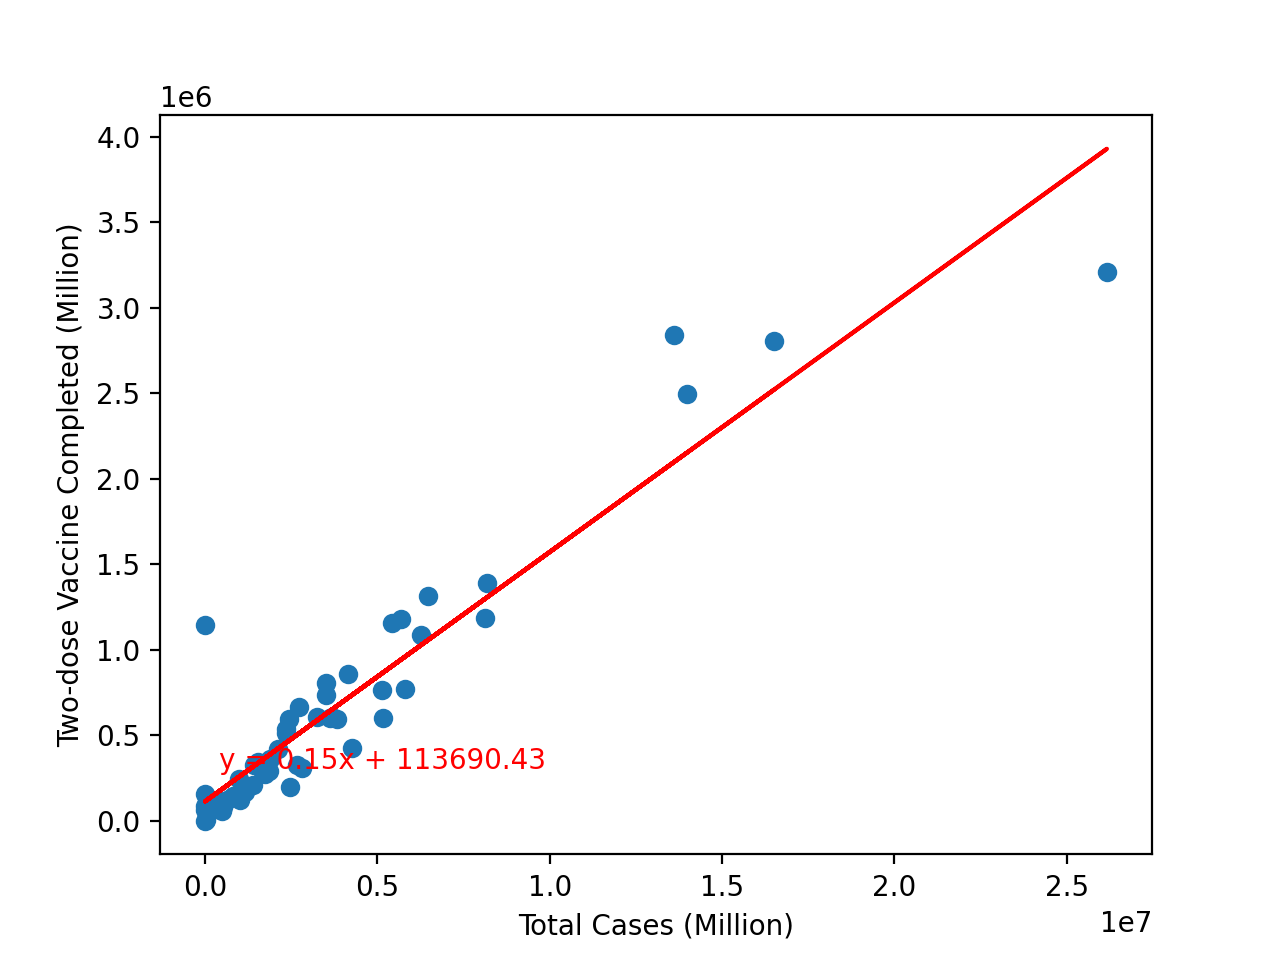

The correlation between both factors is 0.94


In [60]:
#Compare the calcualted Pearson's r to the plots
x_values=vaccine_complete
y_values=case_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(400000.0,300000.0),fontsize=10,color="red")

plt.xlabel('Total Cases (Million)')
plt.ylabel('Two-dose Vaccine Completed (Million)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Images/Total cases Vs Number vaccinated.png")

plt.show()

In [49]:
state1=state.sort_values('Monthly_Cases', ascending=False)
state1.head()

,State,Monthly_Cases
4,CA,3207753.0
9,FL,2843085.0
45,TX,2804354.0
35,NY,2494930.0
39,PA,1390364.0


<IPython.core.display.Javascript object>


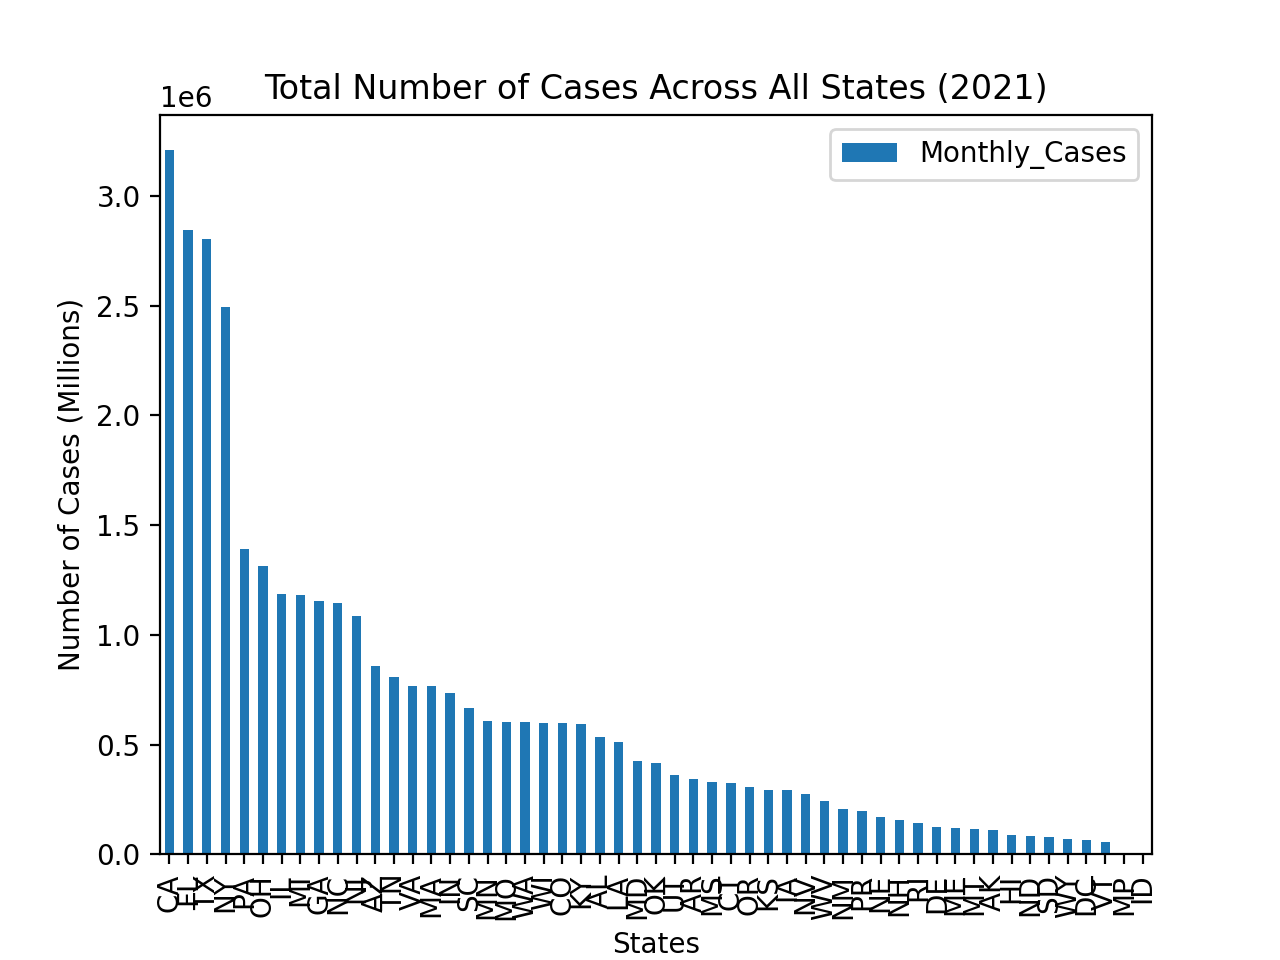

In [14]:
state_cases=state1.plot(kind='bar', x='State', y='Monthly_Cases')
state_cases.set_xlabel("States")
state_cases.set_ylabel("Number of Cases (Millions)")
state_cases.set_title("Total Number of Cases Across All States (2021)")

#plt.savefig("Images/Total number of Cases Across all States.png")
plt.show()


In [ ]:
#data = df[['State','Monthly_Cases']].nlargest(25,'Monthly_Cases')
#fig = plt.bar(data, x = 'State',y = 'Monthly_Cases',title="Number of total cases in States",)
#fig.show()

In [15]:
month_state=df.groupby(['State']).agg({"Monthly_Cases": "sum"})
month_state.head()

,Monthly_Cases
State,
AK,109390.0
AL,535388.0
AR,341348.0
AZ,857659.0
CA,3207753.0


In [16]:
high_cases = month_state[month_state.Monthly_Cases >= 1000000]
high_cases
state_high=high_cases.reset_index()
state_high

,State,Monthly_Cases
0,CA,3207753.0
1,FL,2843085.0
2,GA,1154432.0
3,IL,1188218.0
4,MI,1179687.0
5,NC,1144434.0
6,NJ,1084872.0
7,NY,2494930.0
8,OH,1315715.0
9,PA,1390364.0


In [17]:
state_highest=state_high.sort_values('Monthly_Cases', ascending=False)
state_highest.head()

,State,Monthly_Cases
0,CA,3207753.0
1,FL,2843085.0
10,TX,2804354.0
7,NY,2494930.0
9,PA,1390364.0


<IPython.core.display.Javascript object>


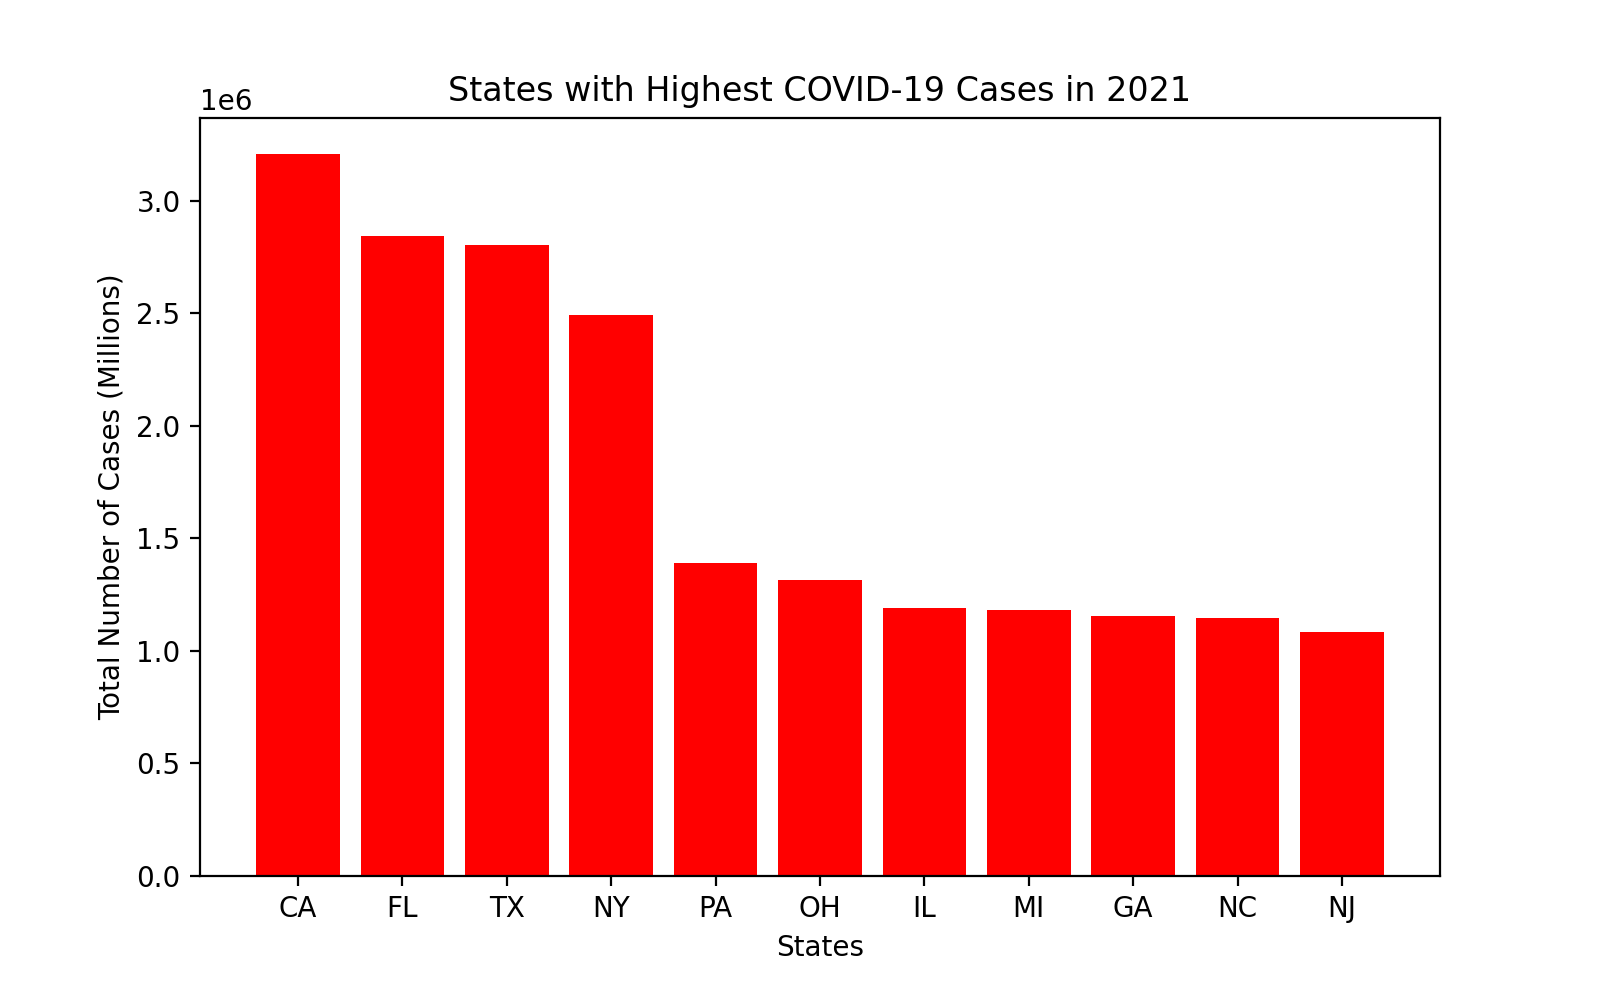

In [18]:
plt.figure(figsize=(5, 6))
plt.bar(state_highest['State'], state_highest['Monthly_Cases'], color='red')
plt.title('States with Highest COVID-19 Cases in 2021')
plt.xlabel('States')
plt.ylabel('Total Number of Cases (Millions)')
#plt.savefig("Images/States with Highest COVID Cases.png")
plt.show()


In [61]:

death_count=df1["Monthly_Cases"].sum()
death_count
state_deaths= death_count.to_frame().reset_index()
state_deaths.head()

,State,Monthly_Cases
0,AK,109390.0
1,AL,535388.0
2,AR,341348.0
3,AZ,857659.0
4,CA,3207753.0


In [70]:
#correlation between total case and positive tests
vaccine_complete = vaccine_complete
death_count = death_count
correlation = st.pearsonr(death_count, vaccine_complete)
correlation
#print(f"The correlation between both factors is {round(correlation[0],2)}")

(0.9412716552946647, 1.0545853819670579e-25)

<IPython.core.display.Javascript object>


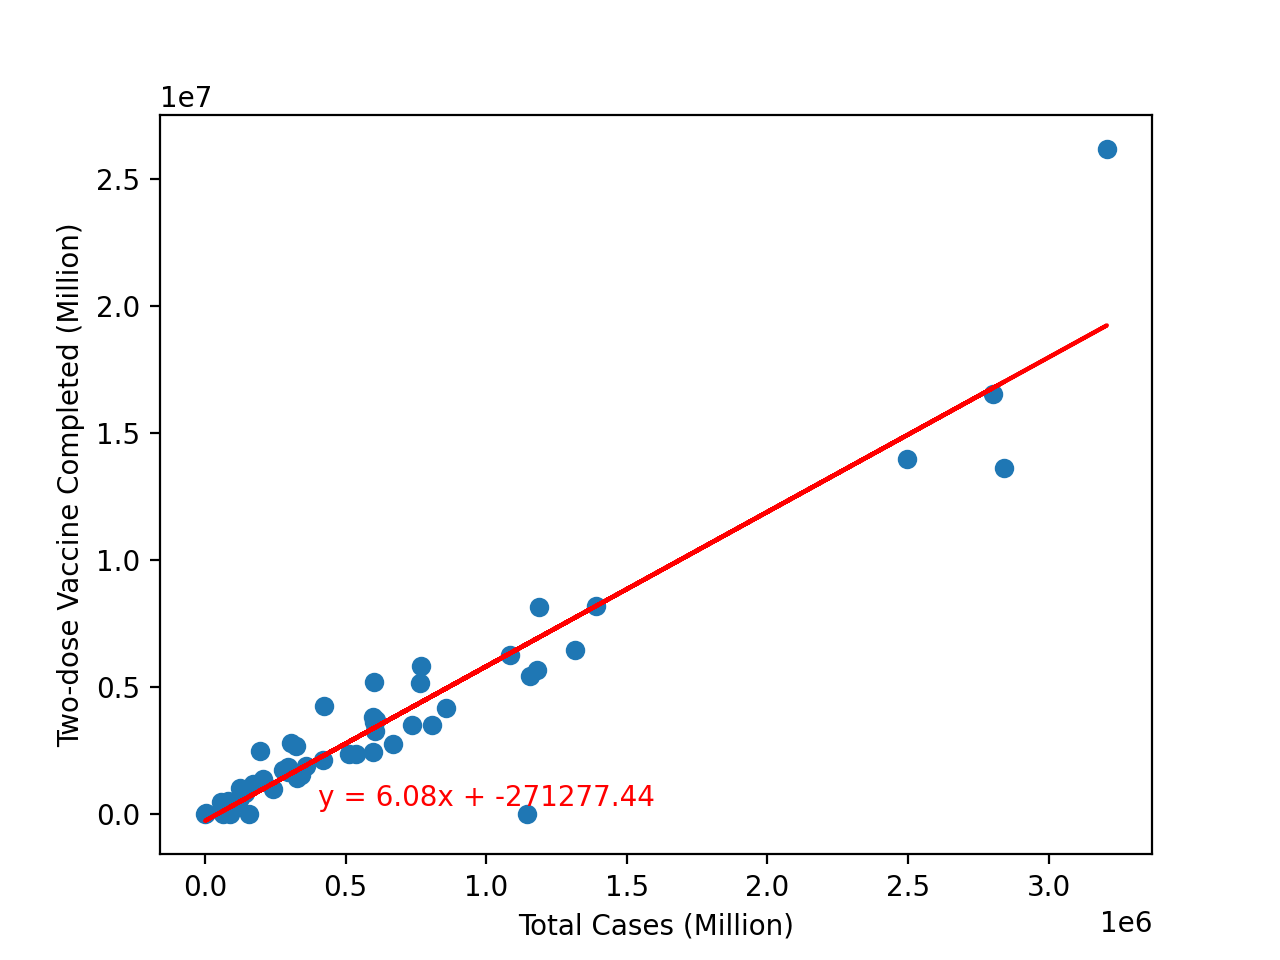

The correlation between both factors is 0.94


In [67]:
#Compare the calcualted Pearson's r to the plots
x_values=death_count
y_values=vaccine_complete
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(400000.0,300000.0),fontsize=10,color="red")

plt.xlabel('Total Cases (Million)')
plt.ylabel('Two-dose Vaccine Completed (Million)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Images/Total cases Vs Number vaccinated.png")

plt.show()

In [20]:
state_dead=state_deaths.sort_values('Monthly_Cases', ascending=False)
state_dead.head()

,State,Monthly_Cases
4,CA,3207753.0
9,FL,2843085.0
45,TX,2804354.0
35,NY,2494930.0
39,PA,1390364.0


<IPython.core.display.Javascript object>


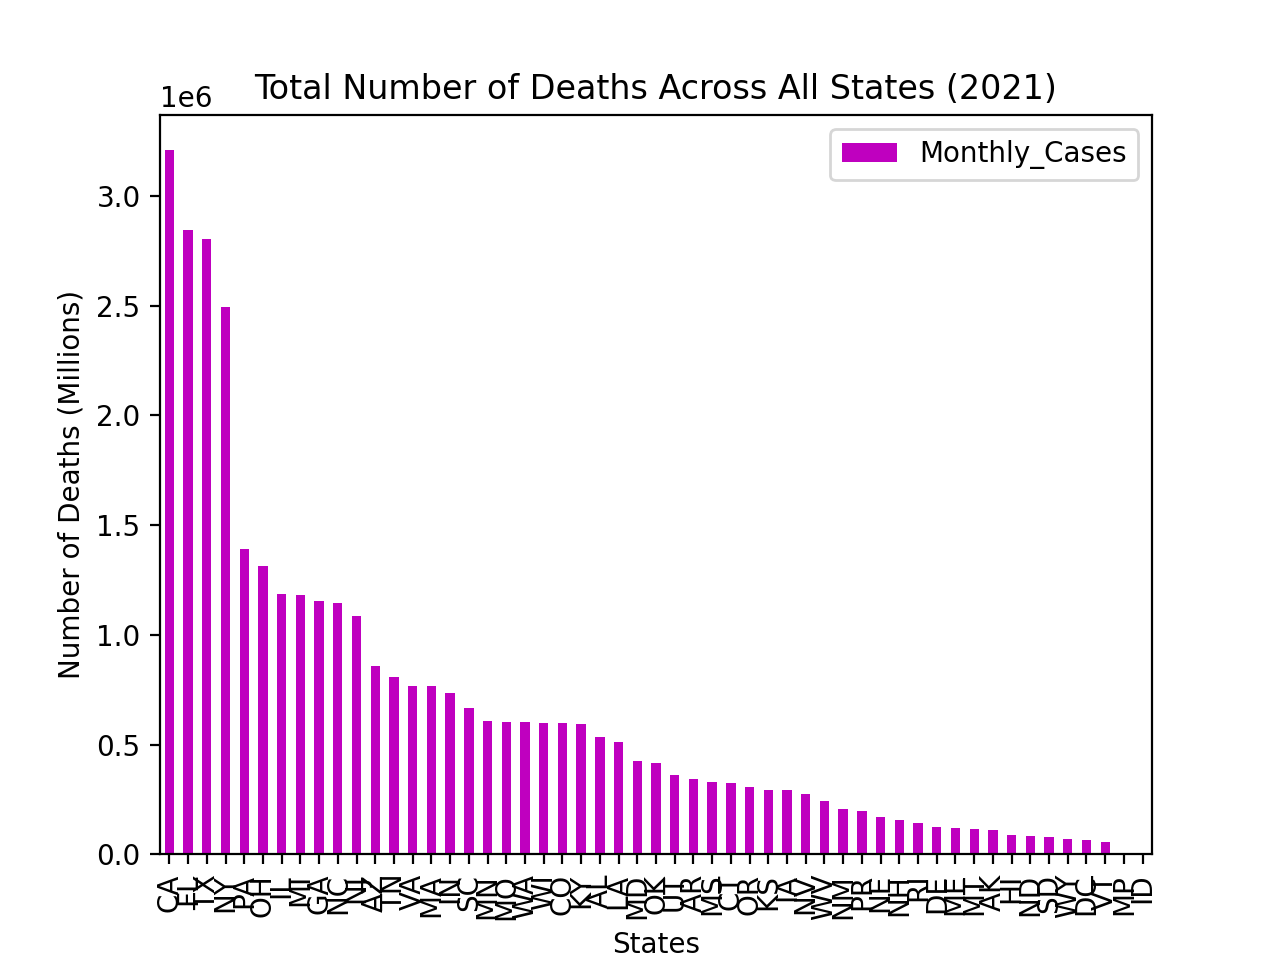

In [34]:
state_deaths=state_dead.plot(kind='bar', x='State', y='Monthly_Cases', color='m')
#state_deaths.CData(5) = [0 0.8 0.8]
state_deaths.set_xlabel("States")
state_deaths.set_ylabel("Number of Deaths (Millions)")
state_deaths.set_title("Total Number of Deaths Across All States (2021)")

#plt.savefig("Images/Total number of Deaths across all States(2021).png")
plt.show()


In [22]:
state_deaths=df.groupby(['State']).agg({"Monthly_Deaths": "sum"})
state_deaths.head()

,Monthly_Deaths
State,
AK,756.0
AL,11628.0
AR,5472.0
AZ,15350.0
CA,50744.0


In [23]:
high_deaths = state_deaths[state_deaths.Monthly_Deaths >= 10000]
high_deaths

state_deaths=high_deaths.reset_index()
state_deaths.head()

,State,Monthly_Deaths
0,AL,11628.0
1,AZ,15350.0
2,CA,50744.0
3,FL,40832.0
4,GA,19695.0


In [24]:
highest_dead=state_deaths.sort_values('Monthly_Deaths', ascending=False)
highest_dead.head()

,State,Monthly_Deaths
2,CA,50744.0
14,TX,47907.0
3,FL,40832.0
10,NY,21436.0
12,PA,20685.0


<IPython.core.display.Javascript object>


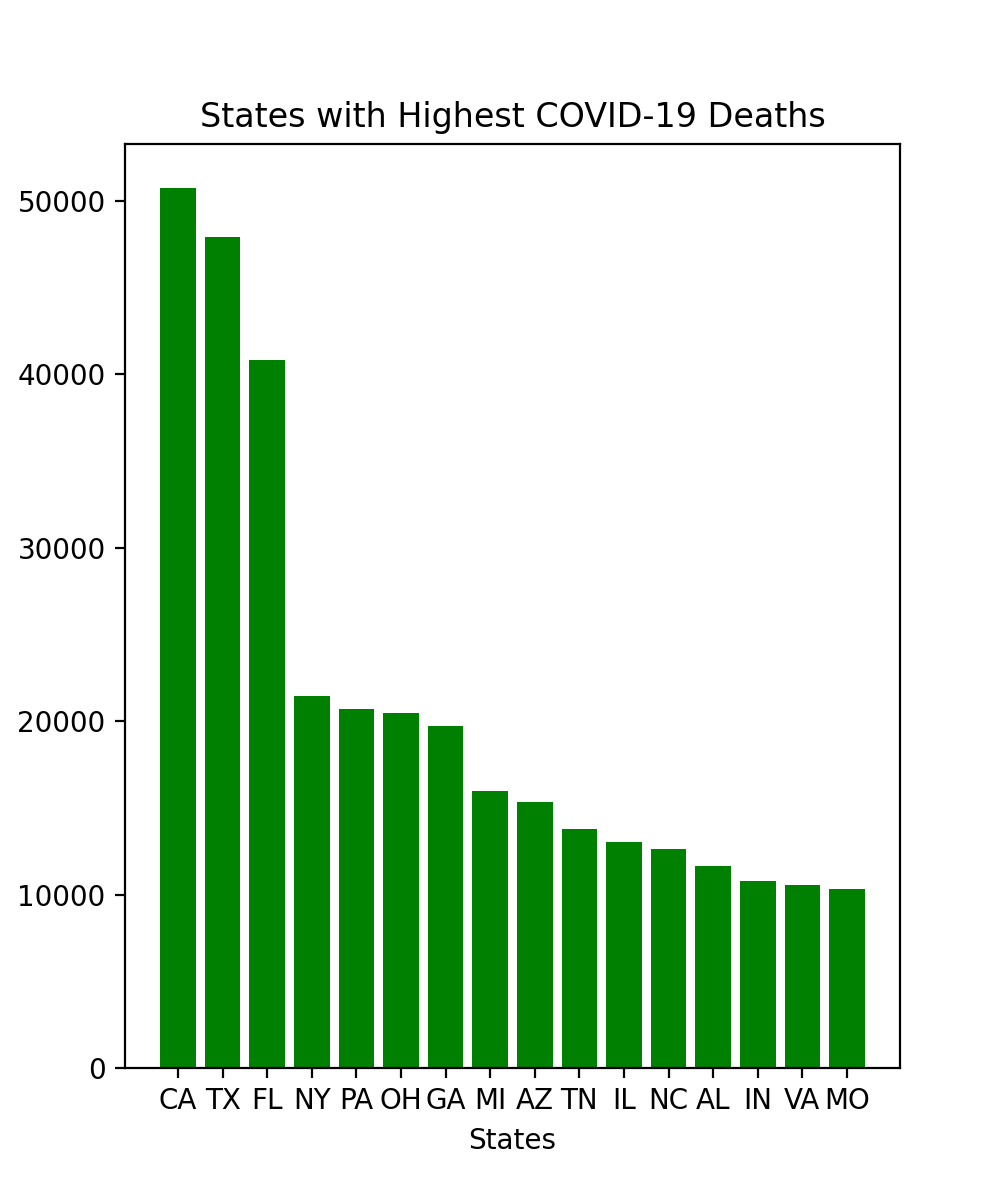

In [32]:
plt.figure(figsize=(5, 6))
plt.bar(highest_dead['State'], highest_dead['Monthly_Deaths'], color='g')
plt.title('States with Highest COVID-19 Deaths')
plt.xlabel('States')
plt.ylabel('Total Number of Deaths')

plt.savefig("Images/States with highest deaths.png")
plt.show()


In [150]:
positive_count=df1["Monthly_Positive"].sum()
positive_count
positive_df= positive_count.to_frame().reset_index()
positive_df.head()

,State,Monthly_Positive
0,AK,70659.0
1,AL,441612.0
2,AR,174412.0
3,AZ,840417.0
4,CA,3410337.0


In [151]:
post_df=positive_df.sort_values('Monthly_Positive', ascending=False)
post_df.head()

,State,Monthly_Positive
4,CA,3410337.0
9,FL,3290496.0
45,TX,2899973.0
35,NY,2691406.0
39,PA,1278507.0


<IPython.core.display.Javascript object>


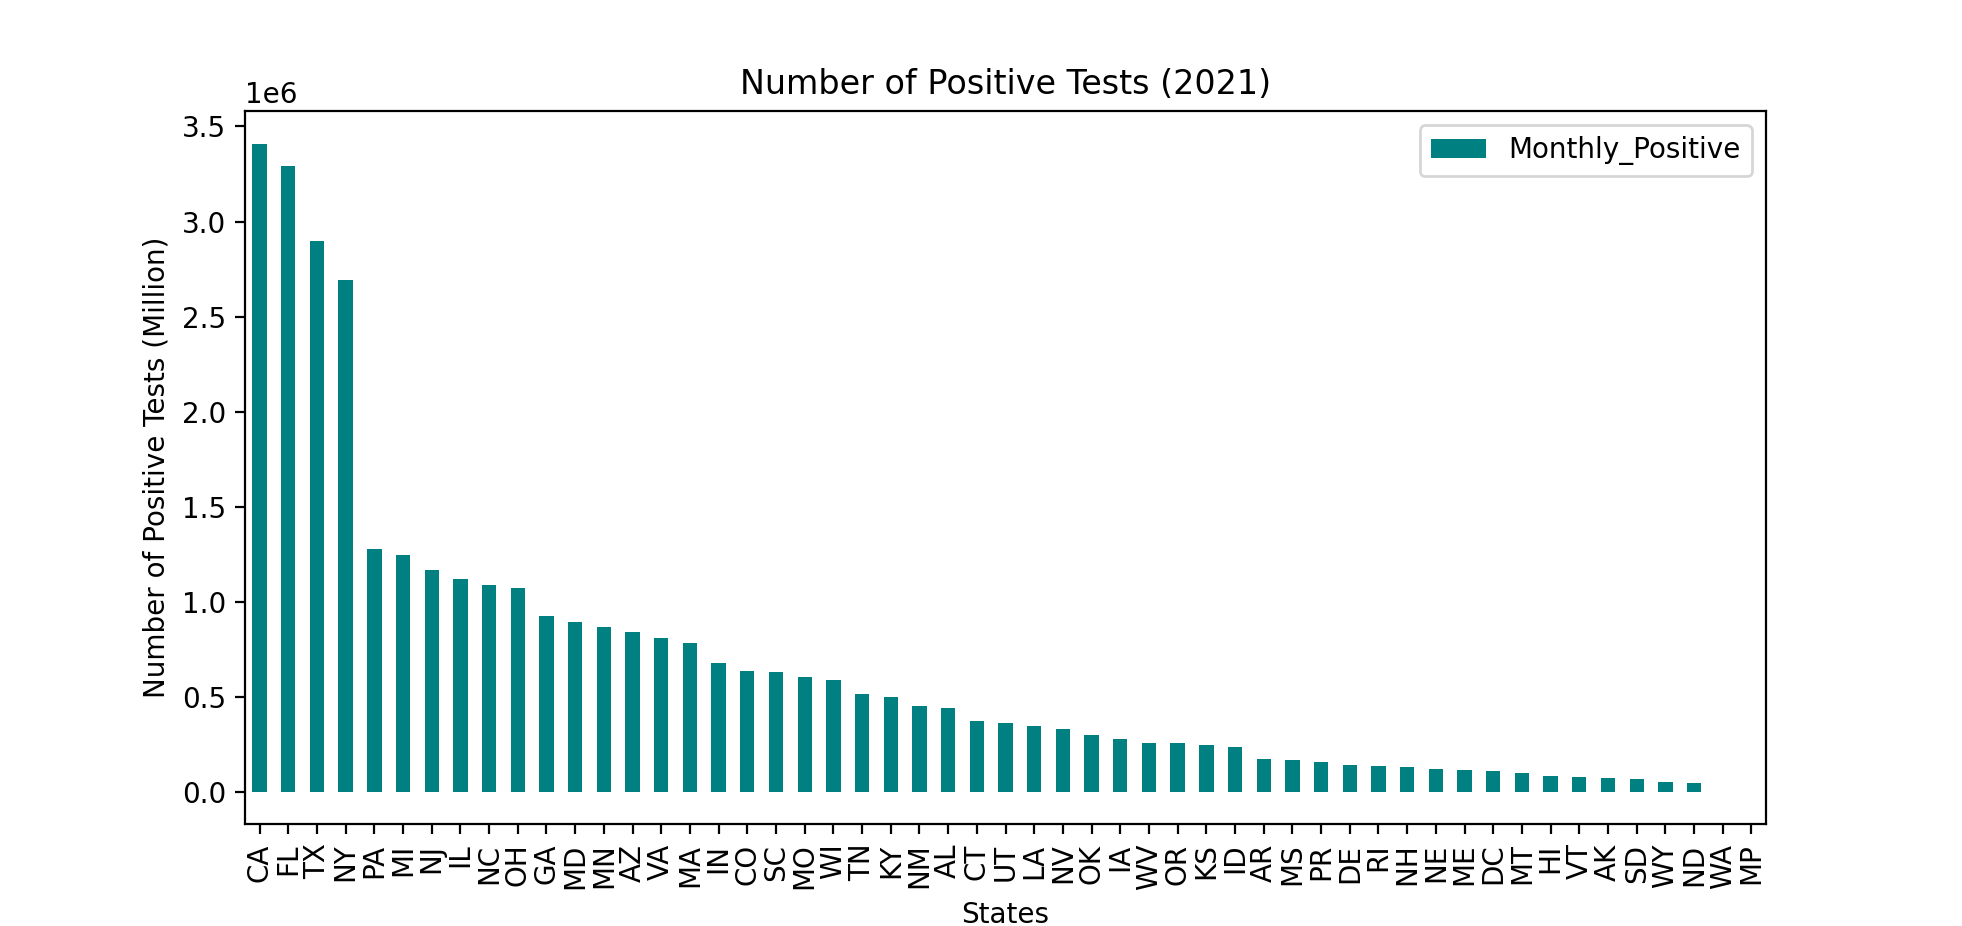

In [152]:

positive_test=post_df.plot(kind='bar', x='State', y='Monthly_Positive', color= 'teal')
positive_test.set_xlabel("States")
positive_test.set_ylabel("Number of Positive Tests (Million)")
positive_test.set_title("Number of Positive Tests (2021)")
plt.savefig("Images/Monthly_positives.png")

plt.show()

In [153]:
negative_count=df1["Monthly_Negatives"].sum()
negative_count
negative_df= negative_count.to_frame().reset_index()
negative_df.head()

,State,Monthly_Negatives
0,AK,1574232.0
1,AL,2901719.0
2,AR,1948377.0
3,AZ,6928702.0
4,CA,73330051.0


In [154]:
neg_df=negative_df.sort_values('Monthly_Negatives', ascending=False)
neg_df.head()

,State,Monthly_Negatives
4,CA,73330051.0
35,NY,45964523.0
9,FL,27027117.0
19,MA,23694975.0
45,TX,23075299.0


<IPython.core.display.Javascript object>


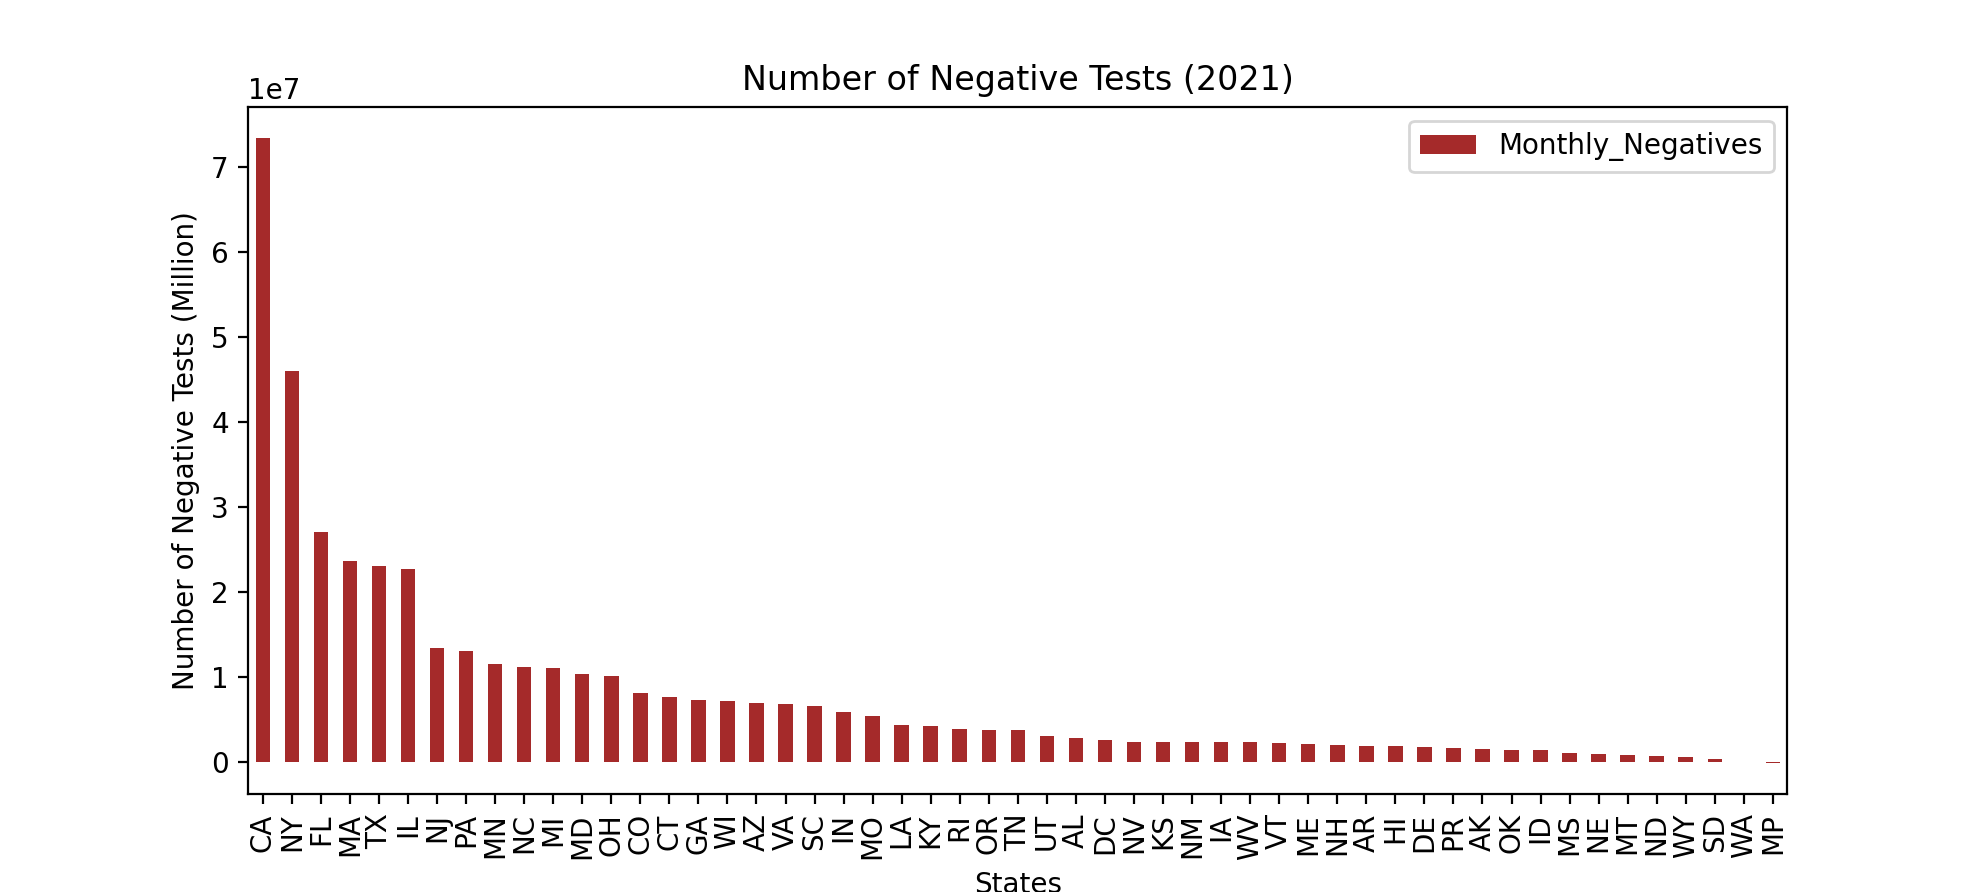

In [155]:
negative_test=neg_df.plot(kind='bar',x='State', y='Monthly_Negatives', color= 'brown')
negative_test.set_xlabel("States")
negative_test.set_ylabel("Number of Negative Tests (Million)")
negative_test.set_title("Number of Negative Tests (2021)")

plt.savefig("Images/Monthly_negatives.png")

plt.show()

In [156]:
correlation1=pd.DataFrame({'Total_cases': case_count,
                          'Positive_test': positive_count,
                          'Negative_test': negative_count})
correlation1.head()

,Total_cases,Positive_test,Negative_test
State,,,
AK,109390.0,70659.0,1574232.0
AL,535388.0,441612.0,2901719.0
AR,341348.0,174412.0,1948377.0
AZ,857659.0,840417.0,6928702.0
CA,3207753.0,3410337.0,73330051.0


In [157]:
#correlation between total case and positive tests
total_cases = case_count
positive_test = positive_count
correlation = st.pearsonr(total_cases, positive_count)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.98


<IPython.core.display.Javascript object>


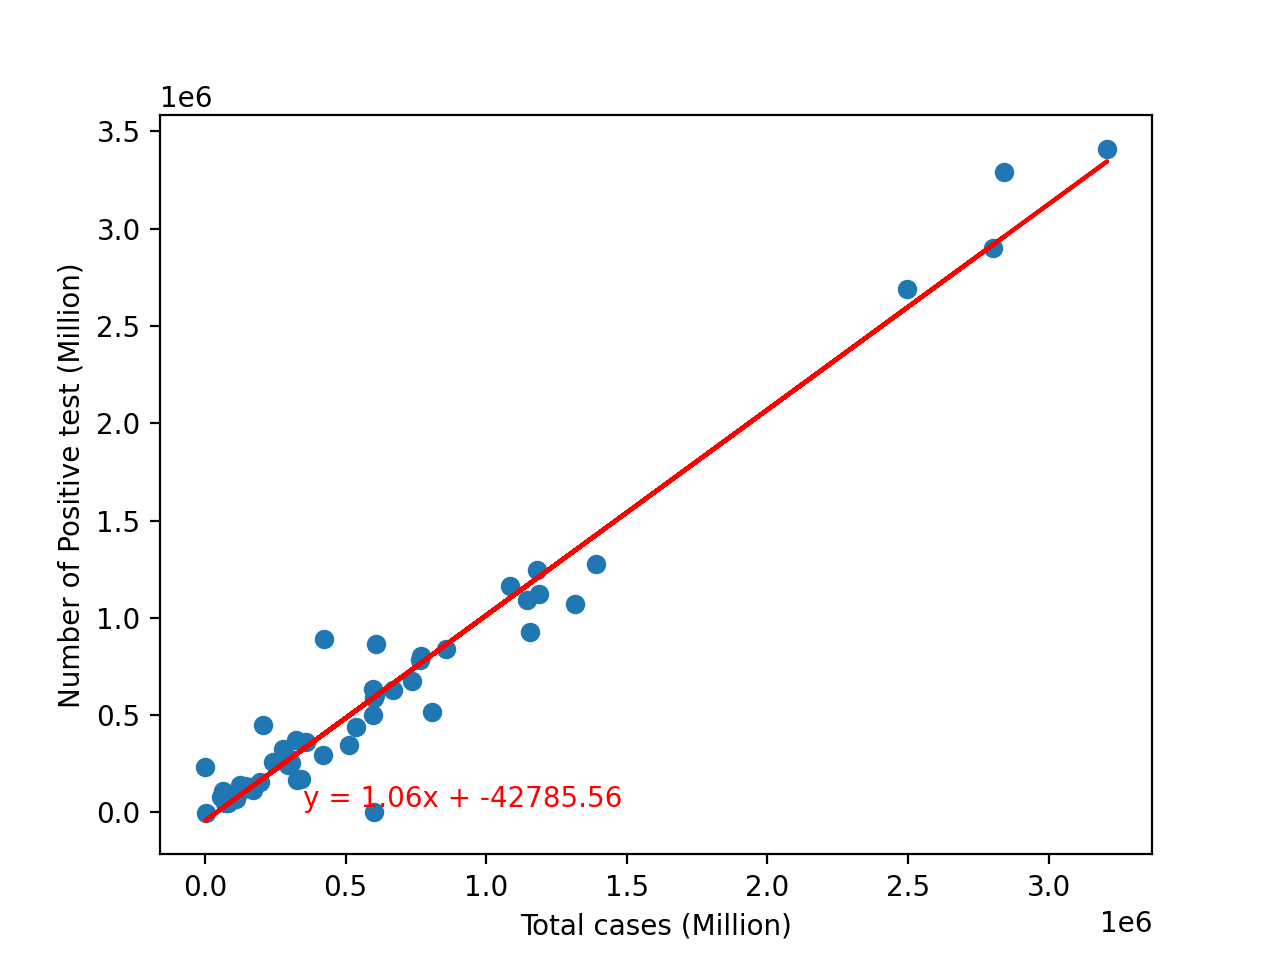

The correlation between both factors is 0.98


In [158]:
#Compare the calcualted Pearson's r to the plots
x_values=total_cases
y_values=positive_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(350000.0,30000.0),fontsize=10,color="red")

plt.xlabel('Total cases (Million)')
plt.ylabel('Number of Positive test (Million)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Images/Total cases Vs Number of positive tests.png")

plt.show()

In [159]:
#correlation between total case and negative tests
total_cases = case_count
negative_test = negative_count
correlation = st.pearsonr(total_cases, negative_count)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.86


<IPython.core.display.Javascript object>


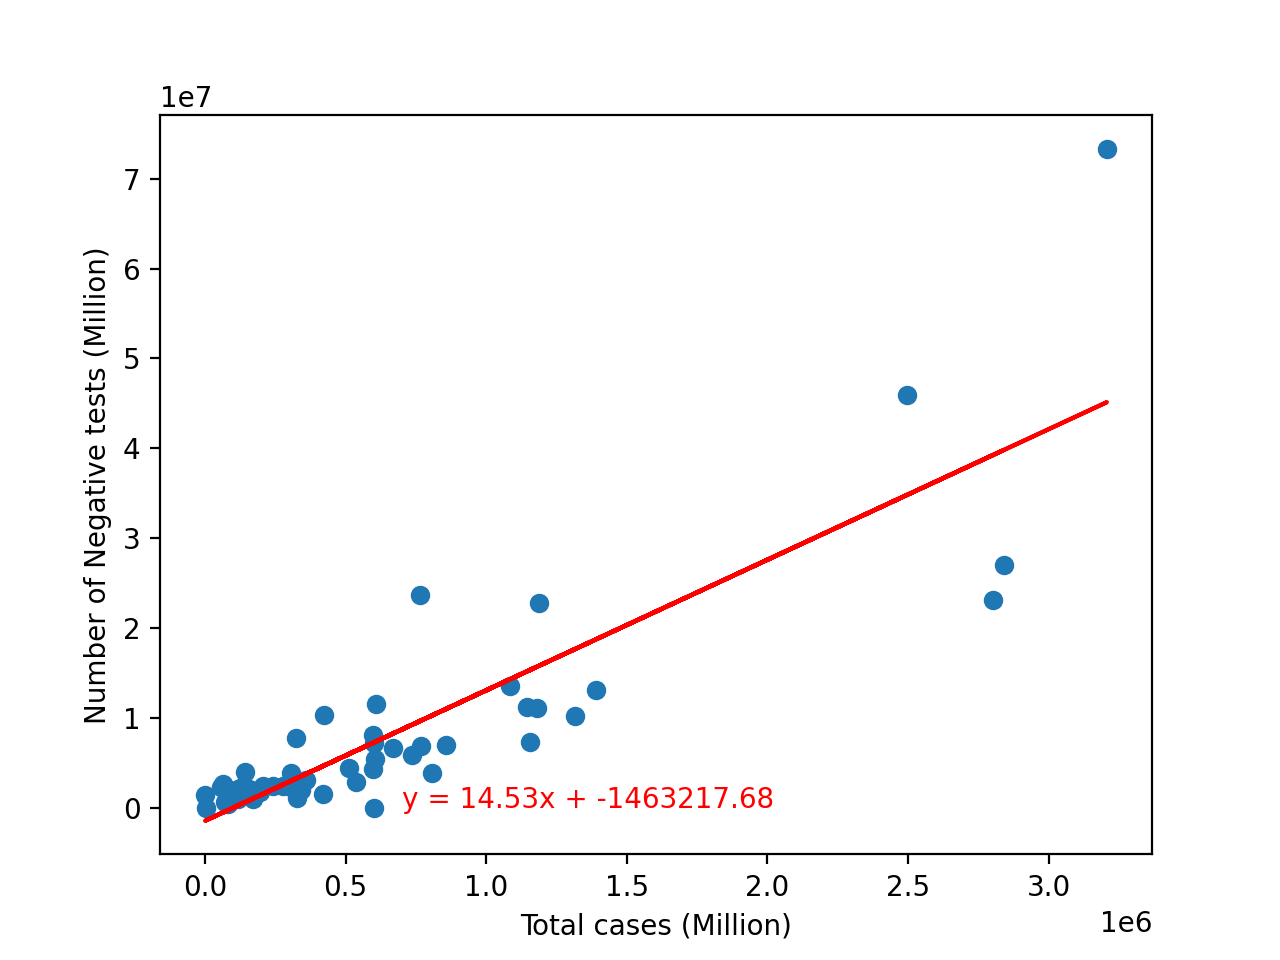

The correlation between both factors is 0.86


In [160]:
#Compare the calcualted Pearson's r to the plots
x_values=total_cases
y_values=negative_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(700000,0.5),fontsize=10,color="red")

plt.xlabel('Total cases (Million)')
plt.ylabel('Number of Negative tests (Million)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig("Images/Total cases vs Number of Negative tests.png")


plt.show()

In [161]:
#calculating mortality rate
#number of deaths by population
#x number of deaths per 100,000 population

mortality_rate =df['Monthly_Deaths']/df['Population']* 100000
mortality_rate


0       7.506759
1       3.548650
2       2.729731
3       4.231083
4       3.002704
         ...    
631    14.167169
632    23.842309
633    30.753123
634    43.883670
635    16.931495
Length: 636, dtype: float64

In [162]:
#splitting year and month column based on delimiter
month=df['Year-Month'].str.split('-', expand=True)
month.columns=['Year', 'Month']
month_num=month['Month']
month_num

0       1
1       2
2       3
3       4
4       5
       ..
631     8
632     9
633    10
634    11
635    12
Name: Month, Length: 636, dtype: object

In [163]:
month_df=pd.DataFrame({'Month':month_num})
month_df

,Month
0,1
1,2
2,3
3,4
4,5
...,...
631,8
632,9
633,10
634,11


In [164]:
#Getting month names based on the month numbers

#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
month_df['Month'] = pd.to_datetime(month_df['Month'], format='%m').dt.month_name().str.slice(stop=3)

month_df

,Month
0,Jan
1,Feb
2,Mar
3,Apr
4,May
...,...
631,Aug
632,Sep
633,Oct
634,Nov


In [165]:
monthly_total=df['Monthly_Cases']
monthly_total
month_name=month_df['Month']
month_name
state_name=df['State']
state_name

0      AK
1      AK
2      AK
3      AK
4      AK
       ..
631    WY
632    WY
633    WY
634    WY
635    WY
Name: State, Length: 636, dtype: object

In [167]:
compare_df=pd.DataFrame({'State': state_name,
                        'Month': month_name,
                        'Monthly_cases': monthly_total,
                        'Mortality_rate': mortality_rate})
compare_df.head()

,State,Month,Monthly_cases,Mortality_rate
0,AK,Jan,7245.0,7.506759
1,AK,Feb,3861.0,3.548650
2,AK,Mar,4713.0,2.729731
3,AK,Apr,5039.0,4.231083
4,AK,May,2029.0,3.002704


In [219]:
compare_df_5 = compare_df.head(60)
compare_df_5.head()

,State,Month,Monthly_cases,Mortality_rate
0,AK,Jan,7245.0,7.506759
1,AK,Feb,3861.0,3.548650
2,AK,Mar,4713.0,2.729731
3,AK,Apr,5039.0,4.231083
4,AK,May,2029.0,3.002704


In [75]:
#month_total_df=compare_df.groupby('Month').agg({"Monthly_cases": "sum"})
#ordered= ['Jan','Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov']
#month_order=month_total_df.reindex(ordered)
#month_order

In [195]:
#ordered= ['Jan','Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
#month_order=compare_df.reindex(ordered)
#month_order

In [217]:
groups=compare_df_5.groupby("State").agg({'Monthly_cases': 'sum','Mortality_rate': 'sum'})
groups.head()

,Monthly_cases,Mortality_rate
State,,
AK,109390.0,103.183821
AL,535388.0,230.719916
AR,341348.0,180.839297
AZ,857659.0,210.958403
CA,3207753.0,129.324155


In [99]:
#groups_index=groups.reset_index()
#groups_index

In [221]:
compare_df_5.head()

,State,Month,Monthly_cases,Mortality_rate
0,AK,Jan,7245.0,7.506759
1,AK,Feb,3861.0,3.548650
2,AK,Mar,4713.0,2.729731
3,AK,Apr,5039.0,4.231083
4,AK,May,2029.0,3.002704


In [222]:
compare_df_5.set_index("Month", inplace=True)

In [226]:
#compare_df_6=compare_df_5.sort_values('Mortality_rate', ascending=False)

#compare_df_6


<IPython.core.display.Javascript object>


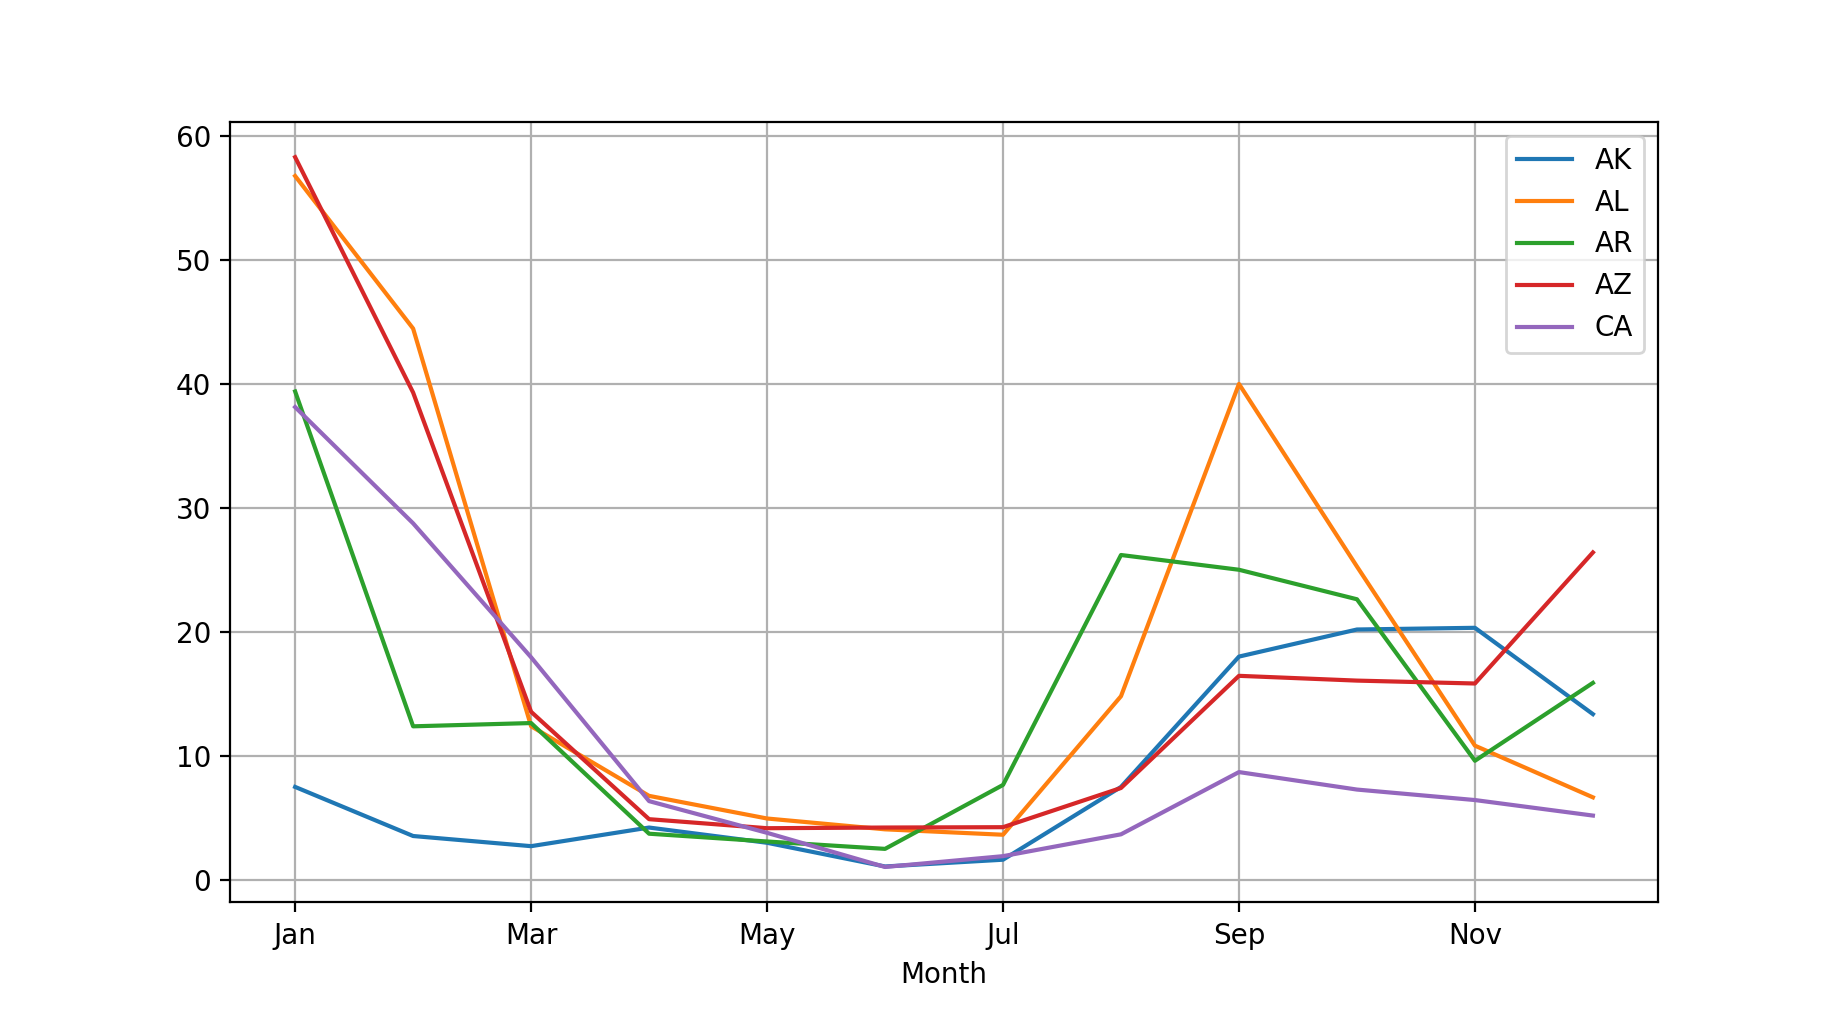

State
AK    AxesSubplot(0.125,0.11;0.775x0.77)
AL    AxesSubplot(0.125,0.11;0.775x0.77)
AR    AxesSubplot(0.125,0.11;0.775x0.77)
AZ    AxesSubplot(0.125,0.11;0.775x0.77)
CA    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Mortality_rate, dtype: object

In [227]:
compare_df_5.groupby("State")["Mortality_rate"].plot(legend=True,grid=True)

<IPython.core.display.Javascript object>


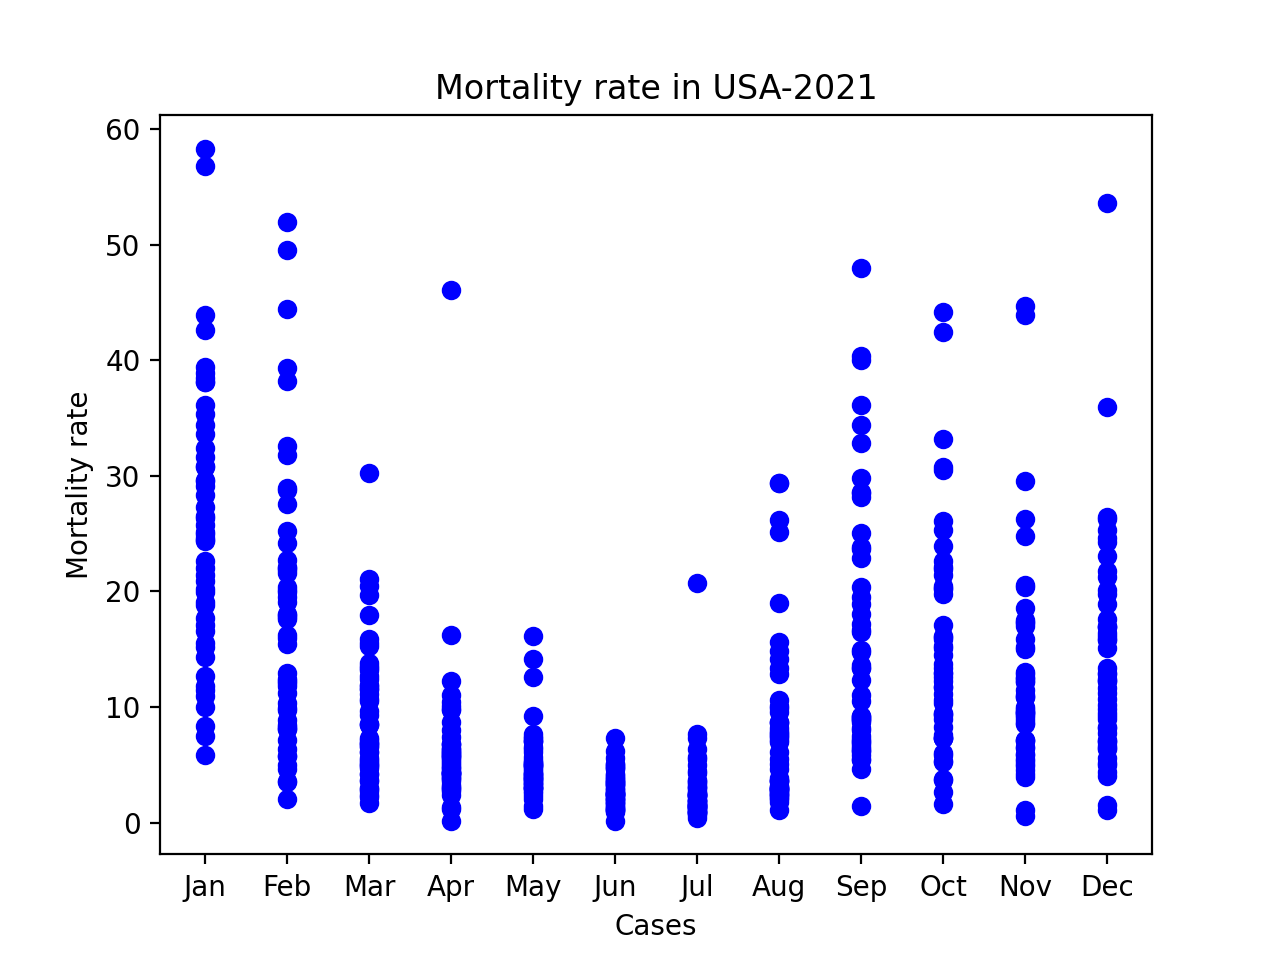

AttributeError: 'Series' object has no attribute 'get_label'

In [229]:
month=compare_df['Month']
case_count=compare_df['Monthly_cases']
death_count=compare_df['Mortality_rate']
#monthly_cases, = plt.scatter(month, case_count, color="red", label="Monthly cases")
plt.scatter(month, death_count, color="blue", label="Mortality rate")
plt.title("Mortality rate in USA-2021")
plt.xlabel("Cases")
plt.ylabel("Mortality rate")

plt.legend(handles=[case_count, death_count], loc="best")

plt.grid()
plt.show()